<a href="https://colab.research.google.com/github/Vihimuro/MDAEL8/blob/main/Minera%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ATENÇÃO! Caso esteja no GitHub, clique acima em Open in Colab para um experiência interativa e completa!

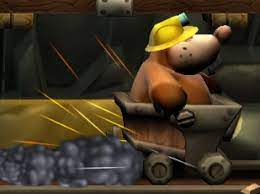

# Mineração de Dados


Alunos: Tiago Júnio Tegon Nascimento e Vinícius Himuro Augusto

Githubs: https://github.com/TiagoTegon/MDAEL8.git e https://github.com/Vihimuro/MDAEL8

Database escolhida: Congressional Voting Records Data Set

link: https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

 # Atividade 1 - Pré-processamento de dados

## Avaliação das características

### Problema a ser investigado

A base de dados possui o posicionamento (a favor ou contra) de senadores sobre alguns assuntos politicos (atributos) e, a partir deles, identificar se uma pessoa analisada integra o partido republicano ou democrata.

Avalie as características da base de dados: problema a ser
investigado, número de amostras, número de atributos, tipos de
atributos, possui valores ausentes?

### Número de amostras

435 amostras, dos quais 267 são democratas e 168 republicanos.

### Atributos

São ao todo 17 atributos booleanos, sendo eles: 


   1. Class Name: 2 (democrat, republican)
   2. handicapped-infants: 2 (y,n)
   3. water-project-cost-sharing: 2 (y,n)
   4. adoption-of-the-budget-resolution: 2 (y,n)
   5. physician-fee-freeze: 2 (y,n)
   6. el-salvador-aid: 2 (y,n)
   7. religious-groups-in-schools: 2 (y,n)
   8. anti-satellite-test-ban: 2 (y,n)
   9. aid-to-nicaraguan-contras: 2 (y,n)
   10. mx-missile: 2 (y,n)
   11. immigration: 2 (y,n)
   12. synfuels-corporation-cutback: 2 (y,n)
   13. education-spending: 2 (y,n)
   14. superfund-right-to-sue: 2 (y,n)
   15. crime: 2 (y,n)
   16. duty-free-exports: 2 (y,n)
   17. export-administration-act-south-africa: 2 (y,n)

### Sobre valores ausentes


Analisando a base de dados, temos 288 dados definidos como '?', porém não são valores ausentes, e sim um posicionamento neutro sobre o atributo. Diante disso, foram cogitados 2 métodos para o tratamento desses valores: 

1- Criar uma terceira classificação denominada abstenção para cada atributo, além de sim e não.

2- Substituir esses valores a partir da moda da classe que a pessoa faz parte (republicano e democrata).

## Código

É necessário fazer o upload da base de dados. Para tal, realize os seguintes passos:

1- acesse https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records

2- clique em data folder

3- clique em house-votes-84.data e baixe o arquivo

4- No notebook, clique em Arquivos na barra da esquerda

5- Em seguida, em Fazer upload para o armazenamento da função (1º ícone da esquerda para a direita)

6- Carregue o arquivo baixado 

Pronto! Podemos começar! 



Começando o código.

Github de referência: https://github.com/murilovarges/DataMiningSamples/blob/master/1-Preprocessing/DataCleaning.py

Fazendo os imports 

In [161]:
import pandas as pd
import numpy as np

Faz a leitura do arquivo

In [162]:
names = ['Class-Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'] 
features = ['Class-Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'] 
output_file_abstencao = '/content/house-votes-84-abstencao.data'
output_file_moda = '/content/house-votes-84-moda.data'
input_file = '/content/house-votes-84.data' 
df = pd.read_csv(input_file,         # Nome do arquivo com dados
                  names = names,      # Nome das colunas 
                  usecols = features, # Define as colunas que serão  utilizadas
                  na_values='?')      # Define que ? será considerado valores ausentes
  

Mostrando os dados

In [163]:
df_original = df.copy()
# Imprime as 15 primeiras linhas do arquivo
print("PRIMEIRAS 15 LINHAS\n")
print(df.head(15))
print("\n") 

PRIMEIRAS 15 LINHAS

    Class-Name handicapped-infants water-project-cost-sharing  \
0   republican                   n                          y   
1   republican                   n                          y   
2     democrat                 NaN                          y   
3     democrat                   n                          y   
4     democrat                   y                          y   
5     democrat                   n                          y   
6     democrat                   n                          y   
7   republican                   n                          y   
8   republican                   n                          y   
9     democrat                   y                          y   
10  republican                   n                          y   
11  republican                   n                          y   
12    democrat                   n                          y   
13    democrat                   y                          y   
14  

Alterando os dados dos atributos para valores numéricos

In [164]:
# republican => 0
df['Class-Name'] = df['Class-Name'].replace(['republican'],0)

# democrat => 1
df['Class-Name'] = df['Class-Name'].replace(['democrat'],1)

# n-> 0
df = df.replace(['n'],int(0))

# y-> 1
df = df.replace(['y'],int(1))

Para ver a mudança: 

In [165]:
df_original = df.copy()
# Imprime as 15 primeiras linhas do arquivo
print("PRIMEIRAS 15 LINHAS\n")
print(df.head(15))
print("\n") 

PRIMEIRAS 15 LINHAS

    Class-Name  handicapped-infants  water-project-cost-sharing  \
0            0                  0.0                         1.0   
1            0                  0.0                         1.0   
2            1                  NaN                         1.0   
3            1                  0.0                         1.0   
4            1                  1.0                         1.0   
5            1                  0.0                         1.0   
6            1                  0.0                         1.0   
7            0                  0.0                         1.0   
8            0                  0.0                         1.0   
9            1                  1.0                         1.0   
10           0                  0.0                         1.0   
11           0                  0.0                         1.0   
12           1                  0.0                         1.0   
13           1                  1.0      

Imprimindo informações sobre os dados

In [166]:
# Imprime informações sobre dos dados
print("INFORMAÇÕES GERAIS DOS DADOS\n")
print(df.info())
print("\n")

INFORMAÇÕES GERAIS DOS DADOS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Class-Name                              435 non-null    int64  
 1   handicapped-infants                     423 non-null    float64
 2   water-project-cost-sharing              387 non-null    float64
 3   adoption-of-the-budget-resolution       424 non-null    float64
 4   physician-fee-freeze                    424 non-null    float64
 5   el-salvador-aid                         420 non-null    float64
 6   religious-groups-in-schools             424 non-null    float64
 7   anti-satellite-test-ban                 421 non-null    float64
 8   aid-to-nicaraguan-contras               420 non-null    float64
 9   mx-missile                              413 non-null    float64
 10  immigration                     

In [167]:
# Imprime uma analise descritiva sobre dos dados
print("DESCRIÇÃO DOS DADOS\n")
print(df.describe())
print("\n")

DESCRIÇÃO DOS DADOS

       Class-Name  handicapped-infants  water-project-cost-sharing  \
count  435.000000           423.000000                  387.000000   
mean     0.613793             0.442080                    0.503876   
std      0.487440             0.497222                    0.500632   
min      0.000000             0.000000                    0.000000   
25%      0.000000             0.000000                    0.000000   
50%      1.000000             0.000000                    1.000000   
75%      1.000000             1.000000                    1.000000   
max      1.000000             1.000000                    1.000000   

       adoption-of-the-budget-resolution  physician-fee-freeze  \
count                         424.000000            424.000000   
mean                            0.596698              0.417453   
std                             0.491140              0.493721   
min                             0.000000              0.000000   
25%               

In [168]:
# Imprime a quantidade de valores faltantes por coluna
print("VALORES FALTANTES\n")
print(df.isnull().sum())
print("\n")

VALORES FALTANTES

Class-Name                                  0
handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64




Imprimindo colunas com valores ausentes

In [169]:
columns_missing_value = df.columns[df.isnull().any()]
print(columns_missing_value)
method = 'number' # number or median or mean or mode

Index(['handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')


Função para atualizar os valores ausentes para 2, usando o método de número


In [170]:
def UpdateMissingValues(df, column, method="number", number=2):
    if method == 'number':
        # Substituindo valores ausentes por um número
        df[column].fillna(number, inplace=True)
    elif method == 'median':
        # Substituindo valores ausentes pela mediana 
        median = df['Density'].median()
        df[column].fillna(median, inplace=True)
    elif method == 'mean':
        # Substituindo valores ausentes pela média
        mean = df[column].mean()
        df[column].fillna(mean, inplace=True)
    elif method == 'mode':
        # Substituindo valores ausentes pela moda
        mode = df[column].mode()[0]
        df[column].fillna(mode, inplace=True)

Salvando um novo arquivo com a substituição para os dados faltantes. para visualizá-lo, atualize a parte de arquivos.


In [171]:
method = 'number' # number or median or mean or mode
    
for c in columns_missing_value:
    UpdateMissingValues(df, c, method, 2)  

# Salva arquivo com o tratamento para dados faltantes
df.to_csv(output_file_abstencao, header=False, index=False)  

# Atividade 2 - Redução e Transformação




- Utilize alguma técnica de normalização de dados;

- Utilize a técnica PCA e plot os dois principais componentes.

## Normalização de dados

###Código

Imports necessários

In [172]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Lendo o arquivo


In [173]:
input_file = '/content/house-votes-84-abstencao.data'
names = ['Class-Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
features = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
target = 'Class-Name'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

Separando as características do alvo

In [174]:
x = df.loc[:, features].values
y = df.loc[:,[target]].values

Função para mostrar o dataframe

In [175]:
def ShowInformationDataFrame(df, message=""):
    print(message+"\n")
    print(df.info())
    print(df.describe())
    print(df.head(10))
    print("\n") 

Mostrando o dataframe

In [176]:
ShowInformationDataFrame(df,"Dataframe original")

Dataframe original

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Class-Name                              435 non-null    int64  
 1   handicapped-infants                     435 non-null    float64
 2   water-project-cost-sharing              435 non-null    float64
 3   adoption-of-the-budget-resolution       435 non-null    float64
 4   physician-fee-freeze                    435 non-null    float64
 5   el-salvador-aid                         435 non-null    float64
 6   religious-groups-in-schools             435 non-null    float64
 7   anti-satellite-test-ban                 435 non-null    float64
 8   aid-to-nicaraguan-contras               435 non-null    float64
 9   mx-missile                              435 non-null    float64
 10  immigration                             43

Normalização com Z-score

In [177]:
# Z-score normalization
x_zcore = StandardScaler().fit_transform(x)
normalized1Df = pd.DataFrame(data = x_zcore, columns = features)
normalized1Df = pd.concat([normalized1Df, df[[target]]], axis = 1)
ShowInformationDataFrame(normalized1Df,"Dataframe Z-Score Normalized")

Dataframe Z-Score Normalized

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   handicapped-infants                     435 non-null    float64
 1   water-project-cost-sharing              435 non-null    float64
 2   adoption-of-the-budget-resolution       435 non-null    float64
 3   physician-fee-freeze                    435 non-null    float64
 4   el-salvador-aid                         435 non-null    float64
 5   religious-groups-in-schools             435 non-null    float64
 6   anti-satellite-test-ban                 435 non-null    float64
 7   aid-to-nicaraguan-contras               435 non-null    float64
 8   mx-missile                              435 non-null    float64
 9   immigration                             435 non-null    float64
 10  synfuels-corporation-cutback    

Salvando a normalização

In [178]:
# Salva arquivo com o tratamento para dados faltantes
normalized1Df.to_csv('/content/house-votes-z-score.data', header=False, index=False) 

Normalização com Min-Max

In [179]:
# Mix-Max normalization
x_minmax = MinMaxScaler().fit_transform(x)
normalized2Df = pd.DataFrame(data = x_minmax, columns = features)
normalized2Df = pd.concat([normalized2Df, df[[target]]], axis = 1)
ShowInformationDataFrame(normalized2Df,"Dataframe Min-Max Normalized")

Dataframe Min-Max Normalized

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   handicapped-infants                     435 non-null    float64
 1   water-project-cost-sharing              435 non-null    float64
 2   adoption-of-the-budget-resolution       435 non-null    float64
 3   physician-fee-freeze                    435 non-null    float64
 4   el-salvador-aid                         435 non-null    float64
 5   religious-groups-in-schools             435 non-null    float64
 6   anti-satellite-test-ban                 435 non-null    float64
 7   aid-to-nicaraguan-contras               435 non-null    float64
 8   mx-missile                              435 non-null    float64
 9   immigration                             435 non-null    float64
 10  synfuels-corporation-cutback    

Salvando a normalização

In [180]:
# Salva arquivo com o tratamento para dados faltantes
normalized2Df.to_csv('/content/house-votes-min-max.data', header=False, index=False) 

##Redução de dados e PCA


###Código

Imports


In [181]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Para sem normalização

Lendo os arquivos


In [182]:
input_file = '/content/house-votes-84-abstencao.data'
names = ['Class-Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
features = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
target = 'Class-Name'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

In [183]:
x = df.loc[:, features].values
y = df.loc[:,[target]].values

Dataframe Normalized

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   handicapped-infants                     435 non-null    float64
 1   water-project-cost-sharing              435 non-null    float64
 2   adoption-of-the-budget-resolution       435 non-null    float64
 3   physician-fee-freeze                    435 non-null    float64
 4   el-salvador-aid                         435 non-null    float64
 5   religious-groups-in-schools             435 non-null    float64
 6   anti-satellite-test-ban                 435 non-null    float64
 7   aid-to-nicaraguan-contras               435 non-null    float64
 8   mx-missile                              435 non-null    float64
 9   immigration                             435 non-null    float64
 10  synfuels-corporation-cutback            

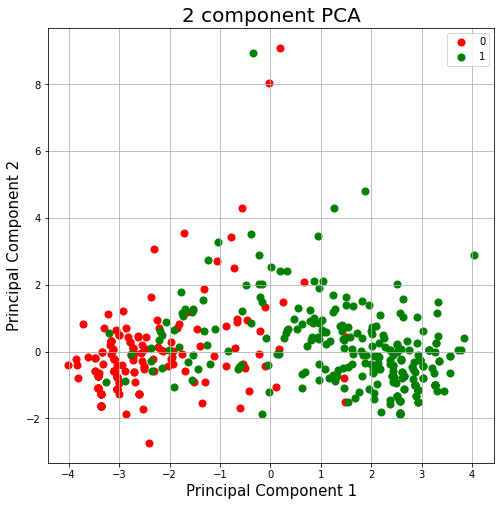

In [184]:
# Standardizing the features
x = StandardScaler().fit_transform(x)
normalizedDf = pd.DataFrame(data = x, columns = features)
normalizedDf = pd.concat([normalizedDf, df[[target]]], axis = 1)
ShowInformationDataFrame(normalizedDf,"Dataframe Normalized")


def VisualizePcaProjection(finalDf, targetColumn):
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title('2 component PCA', fontsize = 20)
  targets = [0, 1, ]
  colors = ['r', 'g']
  for target, color in zip(targets,colors):
    indicesToKeep = finalDf[targetColumn] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                finalDf.loc[indicesToKeep, 'principal component 2'],
                c = color, s = 50)
  ax.legend(targets)
  ax.grid()
  plt.show()


# PCA projection
pca = PCA()    
principalComponents = pca.fit_transform(x)
print("Explained variance per component:")
print(pca.explained_variance_ratio_.tolist())
print("\n\n")

principalDf = pd.DataFrame(data = principalComponents[:,0:2], 
                            columns = ['principal component 1', 
                                      'principal component 2'])
finalDf = pd.concat([principalDf, df[[target]]], axis = 1)    
ShowInformationDataFrame(finalDf,"Dataframe PCA")

VisualizePcaProjection(finalDf, target)



Para normalização com min-max

In [185]:
input_file = '/content/house-votes-min-max.data'
names = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa','Class-Name']
features = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
target = 'Class-Name'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

In [186]:
x = df.loc[:, features].values
y = df.loc[:,[target]].values

Dataframe Normalized

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   handicapped-infants                     435 non-null    float64
 1   water-project-cost-sharing              435 non-null    float64
 2   adoption-of-the-budget-resolution       435 non-null    float64
 3   physician-fee-freeze                    435 non-null    float64
 4   el-salvador-aid                         435 non-null    float64
 5   religious-groups-in-schools             435 non-null    float64
 6   anti-satellite-test-ban                 435 non-null    float64
 7   aid-to-nicaraguan-contras               435 non-null    float64
 8   mx-missile                              435 non-null    float64
 9   immigration                             435 non-null    float64
 10  synfuels-corporation-cutback            

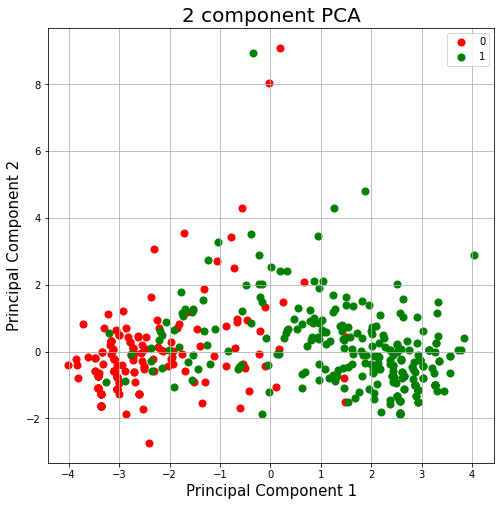

In [187]:
# Standardizing the features
x = StandardScaler().fit_transform(x)
normalizedDf = pd.DataFrame(data = x, columns = features)
normalizedDf = pd.concat([normalizedDf, df[[target]]], axis = 1)
ShowInformationDataFrame(normalizedDf,"Dataframe Normalized")


def VisualizePcaProjection(finalDf, targetColumn):
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title('2 component PCA', fontsize = 20)
  targets = [0, 1, ]
  colors = ['r', 'g']
  for target, color in zip(targets,colors):
    indicesToKeep = finalDf[targetColumn] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                finalDf.loc[indicesToKeep, 'principal component 2'],
                c = color, s = 50)
  ax.legend(targets)
  ax.grid()
  plt.show()


# PCA projection
pca = PCA()    
principalComponents = pca.fit_transform(x)
print("Explained variance per component:")
print(pca.explained_variance_ratio_.tolist())
print("\n\n")

principalDf = pd.DataFrame(data = principalComponents[:,0:2], 
                            columns = ['principal component 1', 
                                      'principal component 2'])
finalDf = pd.concat([principalDf, df[[target]]], axis = 1)    
ShowInformationDataFrame(finalDf,"Dataframe PCA")

VisualizePcaProjection(finalDf, target)



Para normalização com z-score

In [188]:
input_file = '/content/house-votes-z-score.data'
names = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa','Class-Name']
features = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
target = 'Class-Name'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

In [189]:
x = df.loc[:, features].values
y = df.loc[:,[target]].values

Dataframe Normalized

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   handicapped-infants                     435 non-null    float64
 1   water-project-cost-sharing              435 non-null    float64
 2   adoption-of-the-budget-resolution       435 non-null    float64
 3   physician-fee-freeze                    435 non-null    float64
 4   el-salvador-aid                         435 non-null    float64
 5   religious-groups-in-schools             435 non-null    float64
 6   anti-satellite-test-ban                 435 non-null    float64
 7   aid-to-nicaraguan-contras               435 non-null    float64
 8   mx-missile                              435 non-null    float64
 9   immigration                             435 non-null    float64
 10  synfuels-corporation-cutback            

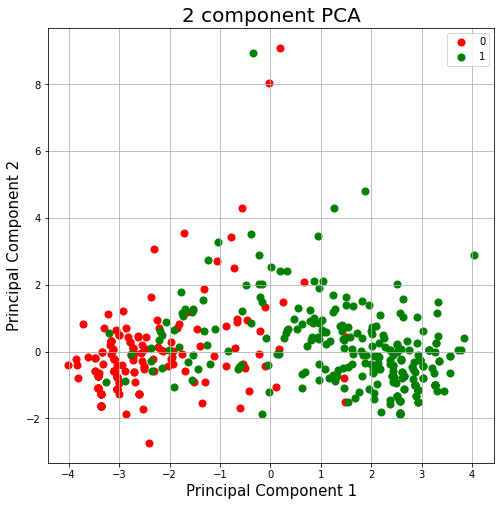

In [190]:
# Standardizing the features
x = StandardScaler().fit_transform(x)
normalizedDf = pd.DataFrame(data = x, columns = features)
normalizedDf = pd.concat([normalizedDf, df[[target]]], axis = 1)
ShowInformationDataFrame(normalizedDf,"Dataframe Normalized")


def VisualizePcaProjection(finalDf, targetColumn):
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1) 
  ax.set_xlabel('Principal Component 1', fontsize = 15)
  ax.set_ylabel('Principal Component 2', fontsize = 15)
  ax.set_title('2 component PCA', fontsize = 20)
  targets = [0, 1, ]
  colors = ['r', 'g']
  for target, color in zip(targets,colors):
    indicesToKeep = finalDf[targetColumn] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                finalDf.loc[indicesToKeep, 'principal component 2'],
                c = color, s = 50)
  ax.legend(targets)
  ax.grid()
  plt.show()


# PCA projection
pca = PCA()    
principalComponents = pca.fit_transform(x)
print("Explained variance per component:")
print(pca.explained_variance_ratio_.tolist())
print("\n\n")

principalDf = pd.DataFrame(data = principalComponents[:,0:2], 
                            columns = ['principal component 1', 
                                      'principal component 2'])
finalDf = pd.concat([principalDf, df[[target]]], axis = 1)    
ShowInformationDataFrame(finalDf,"Dataframe PCA")

VisualizePcaProjection(finalDf, target)



Observando o PCA dos 3 casos, podemos notar que são idênticos, devido ao fato da base de dados já estar normalizada, por se tratar de 3 valores inteiros (0 -contra, 1- a favor e 2- absteve).

Também é possível notar uma separação entre 0 (vermelho/republicanos) e 1 (verde/ democratas) a partir do componente 1, sendo a maioria dos vermelhos com valores negativos e a maioria dos verdes com valores positivos.

#Atividade 3 - Análise Descritiva - Visualização dos Dados


O gráfico que melhor representa o conjunto de dados é o Gráfico de Setores. 
Foram construídos 3 gráficos (total de votos dos democratas, total de votos dos republicanos e total de votos no geral) para cada atributo (pauta).

### Código

In [191]:
import matplotlib.pyplot as plt

In [192]:
input_file = '/content/house-votes-84-abstencao.data'
names = ['Class-Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
features = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
target = 'Class-Name'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

Mostrando o número de republicanos e de democratas

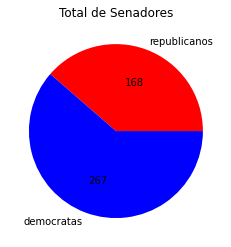

Total: 435

Republicanos: 38.62%

Democratas: 61.38



In [193]:
label = ['republicanos','democratas']
cores = ['r','b']
republicanos = df['Class-Name'].value_counts()[0]
democratas = df['Class-Name'].value_counts()[1]
total = republicanos + democratas
y = np.array([republicanos, democratas])
plt.pie(y , labels=label, colors=cores, autopct= lambda x: '{:.0f}'.format(x*y.sum()/100, startangle=90))
plt.title('Total de Senadores')
plt.show() 
print("Total: {}\n".format(total) )
print("Republicanos: {:.2f}%\n".format((republicanos*100)/total))
print("Democratas: {:.2f}\n".format((democratas*100)/total))


Mostrando os votos a favor, contra e abstenção no geral para o atributo definido em 'atributo'

In [194]:
atributo = 'export-administration-act-south-africa'

#'handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
#'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
#'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'

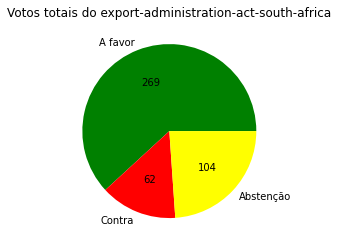

Total: 435
A favor: 61.84%
Contra: 14.25%
Abstenção: 23.91%


In [195]:
label = ['A favor','Contra','Abstenção']
cores = ['green', 'red', 'yellow']
favor = df[atributo].value_counts()[1]
contra = df[atributo].value_counts()[0]
abstencao = df[atributo].value_counts()[2]
total = favor+contra+abstencao
y = np.array([favor,contra,abstencao])
plt.pie(y, labels=label, colors=cores, autopct= lambda x: '{:.0f}'.format(x*y.sum()/100, startangle=90))
plt.title('Votos totais do {}'.format(atributo))
plt.show() 
print("Total: {}".format(total) )
print("A favor: {:.2f}%".format((favor*100)/total))
print("Contra: {:.2f}%".format((contra*100)/total))
print("Abstenção: {:.2f}%".format((abstencao*100)/total))

Mostrando os votos a favor, contra e abstenção entre os republicanos

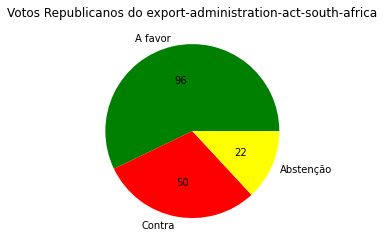

Total: 168
A favor: 57.14%
Contra: 29.76%
Abstenção: 13.10%


In [196]:
label = ['A favor','Contra','Abstenção']
cores = ['green', 'red', 'yellow']
favor = ((df['Class-Name'] == 0) & ((df[atributo]) == 1)).sum()
contra = ((df['Class-Name'] == 0) & ((df[atributo]) == 0)).sum()
abstencao = ((df['Class-Name'] == 0) & ((df[atributo]) == 2)).sum()
total = favor+contra+abstencao
y = np.array([favor,contra,abstencao])
plt.pie(y, labels=label, colors=cores, autopct= lambda x: '{:.0f}'.format(x*y.sum()/100, startangle=90))
plt.title('Votos Republicanos do {}'.format(atributo))
plt.show() 
print("Total: {}".format(total) )
print("A favor: {:.2f}%".format((favor*100)/total))
print("Contra: {:.2f}%".format((contra*100)/total))
print("Abstenção: {:.2f}%".format((abstencao*100)/total))

Mostrando os votos a favor, contra e abstenção entre os democratas

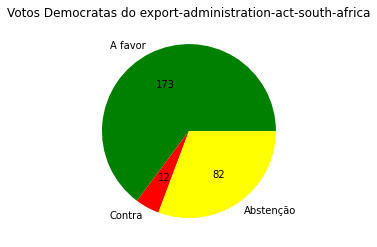

Total: 267
A favor: 64.79%
Contra: 4.49%
Abstenção: 30.71%


In [197]:
label = ['A favor','Contra','Abstenção']
cores = ['green', 'red', 'yellow']
favor = ((df['Class-Name'] == 1) & ((df[atributo]) == 1)).sum()
contra = ((df['Class-Name'] == 1) & ((df[atributo]) == 0)).sum()
abstencao = ((df['Class-Name'] == 1) & ((df[atributo]) == 2)).sum()
total = favor+contra+abstencao
y = np.array([favor,contra,abstencao])
plt.pie(y, labels=label, colors=cores, autopct= lambda x: '{:.0f}'.format(x*y.sum()/100, startangle=90))
plt.title('Votos Democratas do {}'.format(atributo))
plt.show() 
print("Total: {}".format(total) )
print("A favor: {:.2f}%".format((favor*100)/total))
print("Contra: {:.2f}%".format((contra*100)/total))
print("Abstenção: {:.2f}%".format((abstencao*100)/total))

Analisando os gráficos, percebe-se que para:

//podemos padronizar por porcentagem exemplo 45-55%(dividido) 56-65% (maioria 1) 66-75% (maioria 2) 76-85% (maioria 3) +85% (maioria 4) 

**handicapped-infants:**

    Republicanos: maioria 3 - contra
    Democratas: maioria 1 - a favor
    Total: dividido 

**water-project-cost-sharing:**

    Republicanos: dividido
    Democratas: dividido
    Total: dividido 

**adoption-of-the-budget-resolution:**

    Republicanos: maioria 3 - contra
    Democratas: maioria 4 - a favor
    Total: maioria 1 - a favor

**physician-fee-freeze:**

    Republicanos: maioria 4 - a favor
    Democratas: maioria 4 - contra
    Total: maioria 1 - a favor


**el-salvador-aid:**

    Republicanos: maioria 4 - a favor
    Democratas: maioria 2 - contra
    Total: dividido

**religious-groups-in-schools:**

    Republicanos: maioria 4 - a favor
    Democratas: dividido
    Total: maioria 1 - a favor

**anti-satellite-test-ban:**

    Republicanos: maioria 2 - contra
    Democratas: maioria 2 - a favor
    Total: dividido 

**aid-to-nicaraguan-contras:**

    Republicanos: maioria 3 - contra
    Democratas: maioria 3 - a favor
    Total: dividido 

**mx-missile:**

    Republicanos: maioria 4 - contra
    Democratas: maioria 2 - a favor
    Total: dividido 

**'immigration:**

    Republicanos: dividido
    Democratas: dividido
    Total: dividido 

**synfuels-corporation-cutback:**

    Republicanos: maioria 3 - contra
    Democratas: dividido
    Total: maioria 1 - contra

**education-spending:**

    Republicanos: maioria 3 - a favor
    Democratas: maioria 3 - contra
    Total: dividido 

**superfund-right-to-sue:**

    Republicanos: maioria 3 - a favor
    Democratas: maioria 2 - contra
    Total: dividido 

**crime:**

    Republicanos: maioria 4 - a favor
    Democratas: maioria 1 - contra
    Total: maioria 1 - a favor 

**duty-free-exports:**

    Republicanos: maioria 3 - contra
    Democratas: maioria 1 - a favor
    Total: dividido 

**export-administration-act-south-africa:**

    Republicanos: maioria 1 - a favor
    Democratas: maioria 1 - a favor
    Total: maioria 1 - a favor
    obs: muita abstenção 





#Atividade 4 - Análise Descritiva - Medidas de Resumo

Aqui faremos medidas de resumo, como:
- Medidas de tendencia central;
- Medidas de dispersão;
- Medidas de posição relativa;
- Medidas de associação.

##Código

Lendo a Base de Dados

In [198]:
input_file = '/content/house-votes-84-abstencao.data'
names = ['Class-Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
features = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
target = 'Class-Name'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

Escolhendo o atributo

In [199]:
atributo = 'physician-fee-freeze'

# 'Class-Name', 'handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
#'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
#'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'

Medidas de Tendência Central

In [200]:
print("Medidas de Tendência Central\n")
print('Média: {:.2f}'.format(df[atributo].mean())) # Média
print('Mediana: {:.1f}'.format(df[atributo].median())) # Mediana
print('Ponto Médio: {:.0f}'.format((df[atributo].max() + df[atributo].min())/2)) # Ponto Médio
print('Moda: {:.0f}'.format(float(df[atributo].mode()))) # Moda

Medidas de Tendência Central

Média: 0.46
Mediana: 0.0
Ponto Médio: 1
Moda: 0


Medidas de Dispersão

In [201]:
print("Medidas de Dispersão\n")
print('Amplitude: {:.0f}'.format(df[atributo].max() - df[atributo].min()))  # Amplitude
print('Desvio padrão: {:.4f}'.format(df[atributo].std())) # Desvio padrão
print('Variância: {:.4f}'.format(df[atributo].var())) # Variância
print('Coeficiente de variação: {:.4f}'.format(df[atributo].std()/df[atributo].mean())) # Coeficiente de Variação

Medidas de Dispersão

Amplitude: 2
Desvio padrão: 0.5472
Variância: 0.2995
Coeficiente de variação: 1.1962


Medidas de Posição Relativa

In [202]:
print("\nMedidas de Posição Relativa\n")
print('Z Score:\n{}\n'.format((df[atributo] - df[atributo].mean())/df[atributo].std())) # Z Score
print('Quantil (25%): {}'.format(df[atributo].quantile(q=0.25))) # Quantil 25%
print('Quantil (50%): {}'.format(df[atributo].quantile(q=0.50))) # Quantil 50%
print('Quantil (75%): {}'.format(df[atributo].quantile(q=0.75))) # Quantil 75%


Medidas de Posição Relativa

Z Score:
0      0.991419
1      0.991419
2      2.818824
3     -0.835985
4     -0.835985
         ...   
430    0.991419
431   -0.835985
432    0.991419
433    0.991419
434    0.991419
Name: physician-fee-freeze, Length: 435, dtype: float64

Quantil (25%): 0.0
Quantil (50%): 0.0
Quantil (75%): 1.0


Medidas de Associação

In [203]:
print("\nMedidas de Associação\n")
print('Covariância: \n{}\n'.format(df.cov())) # Covariância
print('\nCorrelação: \n{}'.format(df.corr())) # Correlação


Medidas de Associação

Covariância: 
                                        Class-Name  handicapped-infants  \
Class-Name                                0.237597             0.102511   
handicapped-infants                       0.102511             0.305652   
water-project-cost-sharing               -0.006023             0.038821   
adoption-of-the-budget-resolution         0.175592             0.118915   
physician-fee-freeze                     -0.212315            -0.079554   
el-salvador-aid                          -0.160226            -0.081530   
religious-groups-in-schools              -0.090911            -0.086652   
anti-satellite-test-ban                   0.120086             0.107119   
aid-to-nicaraguan-contras                 0.136056             0.101531   
mx-missile                                0.165756             0.113481   
immigration                              -0.021135            -0.003602   
synfuels-corporation-cutback              0.080995            

Matriz de Correlação

In [204]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Class-Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
Class-Name,1.000000,0.380395,-0.018560,0.676258,-0.795967,-0.584265,-0.358753,0.448214,0.506271,0.578097,-0.081648,0.283345,-0.536044,-0.443033,-0.538348,0.390387,0.342197
handicapped-infants,0.380395,1.000000,0.105481,0.403787,-0.262956,-0.262121,-0.301486,0.352507,0.333097,0.348948,-0.012268,0.148313,-0.219746,-0.227711,-0.261709,0.151937,0.263546
water-project-cost-sharing,-0.018560,0.105481,1.000000,0.039210,0.138366,0.136027,0.161946,-0.085728,0.000260,-0.087735,-0.070797,0.144949,0.044941,0.201329,0.020942,0.023271,0.118443
adoption-of-the-budget-resolution,0.676258,0.403787,0.039210,1.000000,-0.464820,-0.438152,-0.265103,0.473806,0.557397,0.539170,0.061886,0.233233,-0.388872,-0.302286,-0.431608,0.376696,0.378472
physician-fee-freeze,-0.795967,-0.262956,0.138366,-0.464820,1.000000,0.593434,0.417142,-0.437761,-0.438618,-0.521291,0.069629,-0.084972,0.500310,0.525364,0.539605,-0.302520,-0.290978
el-salvador-aid,-0.584265,-0.262121,0.136027,-0.438152,0.593434,1.000000,0.578565,-0.458529,-0.537219,-0.575354,0.054340,-0.005683,0.479885,0.479443,0.570132,-0.345728,-0.223701
religious-groups-in-schools,-0.358753,-0.301486,0.161946,-0.265103,0.417142,0.578565,1.000000,-0.334277,-0.336305,-0.404171,0.104758,0.115138,0.392973,0.467189,0.491298,-0.240875,-0.133403
anti-satellite-test-ban,0.448214,0.352507,-0.085728,0.473806,-0.437761,-0.458529,-0.334277,1.000000,0.631455,0.569680,0.101261,0.094013,-0.287939,-0.364813,-0.318505,0.434750,0.365231
aid-to-nicaraguan-contras,0.506271,0.333097,0.000260,0.557397,-0.438618,-0.537219,-0.336305,0.631455,1.000000,0.604281,0.072276,0.192023,-0.311607,-0.286561,-0.349530,0.456214,0.408703
mx-missile,0.578097,0.348948,-0.087735,0.539170,-0.521291,-0.575354,-0.404171,0.569680,0.604281,1.000000,0.083258,0.081582,-0.340548,-0.337433,-0.393975,0.390068,0.325532


Para Class-Name, desconsiderando sua relação com si mesma: 
- quanto mais próximo de 1, mais democrata a pauta é
- quanto mais próximo de -1, mais repubicana a pauta é,
- quanto mais próximo de 0, mais neutra ela é 
                  
Para o resto das relações, desconsiderando as mesmas relações:
- quanto mais próximo de 1, mais elas se parecem
- quanto mais próximo de -1, mais ela se parecem inversamente 
- quanto mais próximo de 0, menos elas se parecem

Gráfico de dispersão

In [205]:
atributo = 'el-salvador-aid'

# 'Class-Name', 'handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
#'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
#'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'

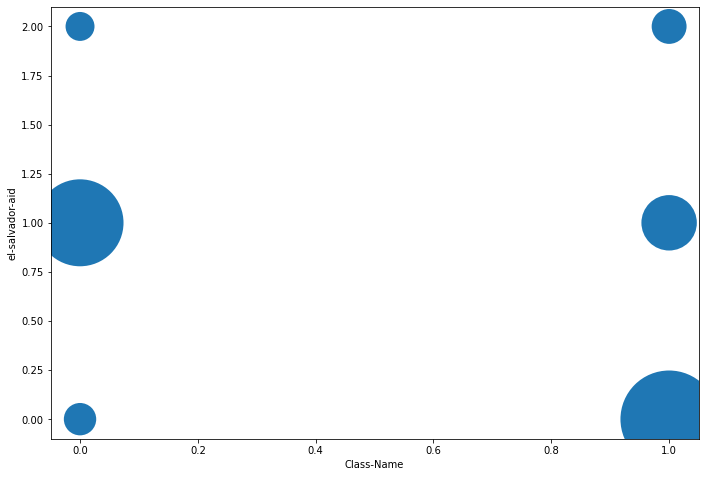

In [206]:
import seaborn as sns

df_dispersao =df[['Class-Name', atributo]]
df_dispersao = df_dispersao.groupby(['Class-Name',atributo]).size().reset_index(name="tamanho")
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])

ax = sns.scatterplot(data=df_dispersao, x='Class-Name', y = atributo, size="tamanho", legend=False, sizes=(1000,10000))
plt.show()

Lembrete: 


Class-Name: 0- Republicano e 1- Democrata

Atributos: 0-contra, 1- a favor, 2 - abstenção


#Atividade 5 - Análise de Grupos

## Aplicando o algoritmo K-means

Importando as bibliotecas necessárias

In [207]:
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

Definindo a função K-means do zero.

In [208]:
def KMeans_scratch(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids, 'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids, 'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points

Plotando os gráficos

In [209]:

def plot_samples(projected, labels, title):    
    fig = plt.figure()
    u_labels = np.unique(labels)
    for i in u_labels:
        plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,
                    edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.legend()
    plt.title(title)


Função main

In [210]:
input_file = '/content/house-votes-84-abstencao.data'
names = ['Class-Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
features = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
target = 'Class-Name'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

[0.35837449 0.11090405]
(435, 2)
411.1564258698644
For n_clusters = 10, silhouette score is 0.5720113555893666)


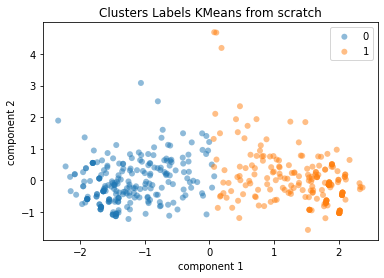

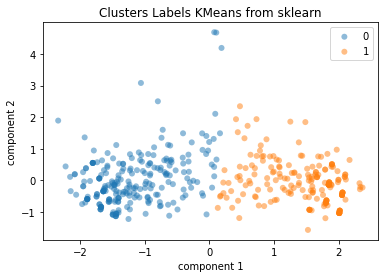

In [211]:
#Load dataset Digits
#show_digitsdataset(digits)

#Transform the data using PCA
pca = PCA(2)
projected = pca.fit_transform(df)
print(pca.explained_variance_ratio_)
#print(df.data.shape)
print(projected.shape)    
#plot_samples(projected, target, 'Original Labels')

#Applying our kmeans function from scratch
labels = KMeans_scratch(projected,2,5)

#Visualize the results 
plot_samples(projected, labels, 'Clusters Labels KMeans from scratch')

#Applying sklearn kemans function
kmeans = KMeans(n_clusters=2).fit(projected)
print(kmeans.inertia_)
centers = kmeans.cluster_centers_
score = silhouette_score(projected, kmeans.labels_)    
print("For n_clusters = {}, silhouette score is {})".format(10, score))

#Visualize the results sklearn
plot_samples(projected, kmeans.labels_, 'Clusters Labels KMeans from sklearn')

plt.show()

##Aplicando algoritmo GMM

Importando as bibliotecas necessárias

In [212]:
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

Lendo a Base de Dados




In [213]:
input_file = '/content/house-votes-84-abstencao.data'
names = ['Class-Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
features = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']
target = 'Class-Name'
df = pd.read_csv(input_file,    # Nome do arquivo com dados
                 names = names) # Nome das colunas

Transformando a base de Dados utilizando o PCA

In [214]:
pca = PCA(2)
projected = pca.fit_transform(df)

Aplicando função sklearn GMM 

In [215]:
gm  = GaussianMixture(n_components=2).fit(projected)
print(gm.weights_)
print(gm.means_)
x = gm.predict(projected)

[0.51554449 0.48445551]
[[-1.22316208 -0.10719475]
 [ 1.30165612  0.11407376]]


Visualizar o resultado gerado pelo sklearn

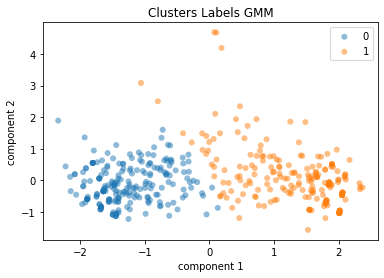

In [216]:
plot_samples(projected, x, 'Clusters Labels GMM')

plt.show()

#Atividade 6 - Classificação de Dados



##Decision Three


Imports

In [217]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
from sklearn.preprocessing import StandardScaler

Importando a base


In [218]:
names = ['Class-Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'] 
features = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'] 
target = 'Class-Name'

input_file = '/content/house-votes-84-abstencao.data' 
df = pd.read_csv(input_file,         # Nome do arquivo com dados
                  names = names)      # Nome das colunas 
  

Separando features de targets

In [219]:
# Separating out the features
X = df.loc[:, features].values

# Separating out the target
y = df.loc[:,[target]].values

Normalizando

In [220]:
 # Standardizing the features
X = StandardScaler().fit_transform(X)
normalizedDf = pd.DataFrame(data = X, columns = features)
normalizedDf = pd.concat([normalizedDf, df[[target]]], axis = 1)

Dividindo em treino e teste

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0) #test_size=0.3,

Gerando e plotando a decision three

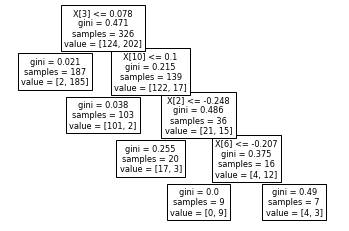

In [222]:
clf = DecisionTreeClassifier(max_leaf_nodes=5)
clf.fit(X_train, y_train)
tree.plot_tree(clf)
plt.show()

In [223]:
predictions = clf.predict(X_test)
print(predictions)

result = clf.score(X_test, y_test)
print('Acuraccy:')
print(result)

[1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0
 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0
 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0]
Acuraccy:
0.963302752293578


#KNN

Imports Necessários


In [224]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from collections import Counter

Funçao para Calcular a Distância entre dois pontos

In [225]:
def minkowski_distance(a, b, p=1):    
    # Store the number of dimensions
    dim = len(a)    
    # Set initial distance to 0
    distance = 0
    
    # Calculate minkowski distance using parameter p
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)    
    return distance

Predição KNN

In [226]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):    
    # Make predictions on the test data
    # Need output of 1 prediction per test data point
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)
        
        # Store distances in a dataframe
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        # Sort distances, and only consider the k closest points
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        # Create counter object to track the labels of k closest neighbors
        counter = Counter(y_train[df_nn.index])

        # Get most common label of all the nearest neighbors
        prediction = counter.most_common()[0][0]
        
        # Append prediction to output list
        y_hat_test.append(prediction)
        
    return y_hat_test

Plotagem da Matriz Confusão

In [303]:
np.set_printoptions(precision=2)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')  

Carregando a Base de Dados

In [228]:
names = ['Class-Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'] 
features = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'] 
target = 'Class-Name'

input_file = '/content/house-votes-84-abstencao.data' 
df = pd.read_csv(input_file,         # Nome do arquivo com dados
                  names = names)      # Nome das colunas 
                  
target_names = ['Democrata','Republicano']

Separando Atributos do Rótulo

In [229]:
# Separating out the features
X = df.loc[:, features].values

df['target'] = target

#X = df.drop('target', axis=1)
#y = df.target.values

# Separating out the target
y = df.loc[:,target]

print("Total samples: {}".format(X.shape[0]))

Total samples: 435


Separando conjunto de Treinameto e conjunto de Teste

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("Total train samples: {}".format(X_train.shape[0]))
print("Total test  samples: {}".format(X_test.shape[0]))

Total train samples: 326
Total test  samples: 109


Normalizando a Base de Dados por meio do Z-Score

In [231]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Realizando a Predição utilizando o Classificador KNN

In [232]:
y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=5, p=2)

Calculando a Acurácia e F1 Score

In [233]:
accuracy = accuracy_score(y_test, y_hat_test)*100
f1 = f1_score(y_test, y_hat_test, average='macro')
print("Acurracy K-NN from scratch: {:.2f}%".format(accuracy))
print("F1 Score K-NN from scratch: {:.2f}%".format(f1))

Acurracy K-NN from scratch: 93.58%
F1 Score K-NN from scratch: 0.93%


Plotando a Matriz Confusão

Confusion matrix, without normalization
[[41  3]
 [ 2 63]]
Normalized confusion matrix
[[0.93 0.07]
 [0.03 0.97]]


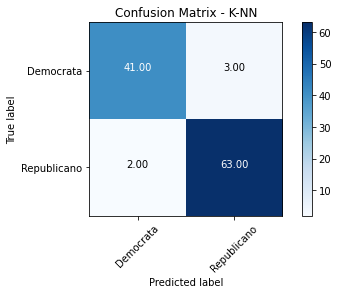

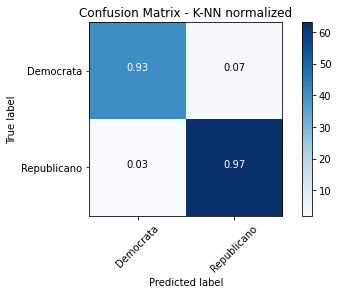

In [304]:
cm = confusion_matrix(y_test, y_hat_test)
plot_confusion_matrix(cm, target_names, False, "Confusion Matrix - K-NN")      
plot_confusion_matrix(cm, target_names, True, "Confusion Matrix - K-NN normalized")  

Utilizando KNN pelo Sklearn

In [235]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_hat_test = knn.predict(X_test)

Calculando a Acurácia e F1 Score - KNN Sklearn

In [236]:
accuracy = accuracy_score(y_test, y_hat_test)*100
f1 = f1_score(y_test, y_hat_test,average='macro')
print("Acurracy K-NN from sk-learn: {:.2f}%".format(accuracy))
print("F1 Score K-NN from sk-learn: {:.2f}%".format(f1))

Acurracy K-NN from sk-learn: 93.58%
F1 Score K-NN from sk-learn: 0.93%


Plotando a Matriz Confusão - KNN Sklearn

Confusion matrix, without normalization
[[41  3]
 [ 2 63]]
Normalized confusion matrix
[[0.93 0.07]
 [0.03 0.97]]


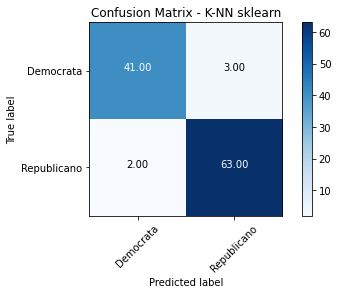

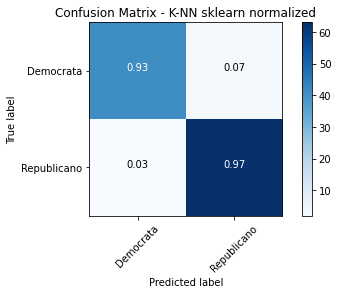

In [305]:
cm = confusion_matrix(y_test, y_hat_test)        
plot_confusion_matrix(cm, target_names, False, "Confusion Matrix - K-NN sklearn")      
plot_confusion_matrix(cm, target_names, True, "Confusion Matrix - K-NN sklearn normalized" )  
plt.show()

Utilizando a Validação Cruzada

In [238]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=10)
print(scores)

[0.93181818 0.93181818 0.95454545 0.95454545 0.97727273 0.95348837
 1.         0.95348837 0.86046512 0.88372093]


##SVM

Importando as Bibliotecas

In [239]:
# Initial imports
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

Carregando a Base de Dados

In [240]:
names = ['Class-Name','handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'] 
features = ['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze','el-salvador-aid',
          'religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa'] 
target = 'Class-Name'

input_file = '/content/house-votes-84-abstencao.data' 
df = pd.read_csv(input_file,         # Nome do arquivo com dados
                  names = names)      # Nome das colunas 
  

Separando Atributos de Rótulo

In [241]:
# Separating out the features
X = df.loc[:, features].values

df['target'] = target

#X = df.drop('target', axis=1)
#y = df.target.values

# Separating out the target
y = df.loc[:,target]

print("Total samples: {}".format(X.shape[0]))

Total samples: 435


Separando Dados de Treinamente e Teste

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print("Total train samples: {}".format(X_train.shape[0]))
print("Total test  samples: {}".format(X_test.shape[0]))

Total train samples: 326
Total test  samples: 109


Normalizando a Base de Dados por meio do Z-Score

In [243]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Testando o método SVM

In [263]:
svm = SVC(kernel='poly', C=1) # poly, rbf, linear
# training using train dataset
svm.fit(X_train, y_train)
# get support vectors
print(svm.support_vectors_)
# get indices of support vectors
print(svm.support_)
# get number of support vectors for each class
print("Qtd Support vectors: ")
print(svm.n_support_)
# predict using test dataset
y_hat_test = svm.predict(X_test)

[[ 0.89283521  1.957856   -1.24270391 ...  0.67665378  2.45775274
   1.56495591]
 [-0.88194698 -0.95657805 -1.24270391 ...  0.67665378 -0.84627775
  -0.12436736]
 [ 0.89283521  0.50063898  0.67730308 ...  0.67665378 -0.84627775
  -0.12436736]
 ...
 [-0.88194698  0.50063898  0.67730308 ...  0.67665378 -0.84627775
  -0.12436736]
 [ 0.89283521 -0.95657805  0.67730308 ...  0.67665378  0.8057375
  -0.12436736]
 [-0.88194698 -0.95657805 -1.24270391 ...  0.67665378  0.8057375
  -0.12436736]]
[  3   7  12  19  24  26  28  31  40  43  44  47  49  55  58  61  66  70
  85  95  98 107 108 115 117 122 131 134 142 147 172 174 188 201 207 210
 225 227 235 246 254 264 265 272 275 290 292 293 308 314 315 319 323   4
   9  13  14  20  29  30  37  45  48  50  59  62  64  65  67  68  75  79
  82  83  86  90  93  99 105 106 109 113 119 125 132 133 153 155 156 158
 170 173 179 183 185 190 194 197 209 220 226 228 229 230 233 234 239 243
 256 257 261 271 273 274 283 284 285 286 305 310 313 322]
Qtd Support ve

Obtendo a Acurácia do Teste

In [264]:
accuracy = accuracy_score(y_test, y_hat_test)*100
f1 = f1_score(y_test, y_hat_test,average='macro')
print("Acurracy SVM from sk-learn: {:.2f}%".format(accuracy))
print("F1 Score SVM from sk-learn: {:.2f}%".format(f1))

Acurracy SVM from sk-learn: 95.41%
F1 Score SVM from sk-learn: 0.95%


Plotando a matriz confusão 

Confusion matrix, without normalization
[[41  3]
 [ 2 63]]
Normalized confusion matrix
[[0.93181818 0.06818182]
 [0.03076923 0.96923077]]


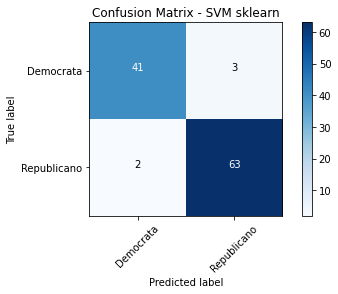

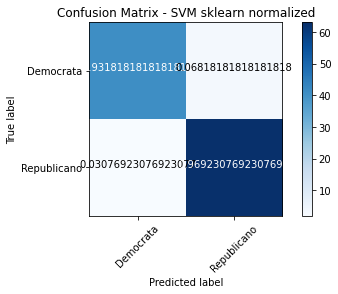

In [279]:
cm = confusion_matrix(y_test, y_hat_test)        
plot_confusion_matrix(cm, target_names, False, "Confusion Matrix - SVM sklearn")      
plot_confusion_matrix(cm, target_names, True, "Confusion Matrix - SVM sklearn normalized" )  
plt.show()